In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!pip install torch torchvision -q
!pip install pandas -q

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the complex neural network class

In [20]:
class myComplexNet(nn.Module):
    def __init__(self):
        super(myComplexNet, self).__init__()
        self.fc1 = nn.Linear(20532, 512)  # Input layer
        self.fc2 = nn.Linear(512, 256)  # Hidden layer 1
        self.fc3 = nn.Linear(256, 128)  # Hidden layer 2
        self.fc4 = nn.Linear(128, 64)  # Hidden layer 3
        self.fc5 = nn.Linear(64, 1)  # Output layer
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc5(x))
        return x

# Load the dataset

In [21]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [22]:
data = pd.read_csv('Data.csv')

# Separate features and target & Split the data

In [23]:
# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize the features

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert to PyTorch tensors

In [25]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train[:, None], dtype=torch.float32)  # Reshape y to [n_samples, 1]
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val[:, None], dtype=torch.float32)

# Create TensorDatasets and DataLoaders

In [26]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Instantiate the model, define loss function and optimizer

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = myComplexNet().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train & Validation

In [28]:
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
num_epochs = 20

In [29]:
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Apply a threshold of 0.5 to model outputs and compare with actual labels
        predicted = (outputs > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            val_running_loss += val_loss.item()

            predicted_val = (outputs > 0.5).float()
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_running_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.2f}%')

Epoch 1/20, Train Loss: 0.5212, Train Accuracy: 81.01%, Val Loss: 0.1676, Val Accuracy: 92.73%
Epoch 2/20, Train Loss: 0.2752, Train Accuracy: 90.10%, Val Loss: 0.1153, Val Accuracy: 98.18%
Epoch 3/20, Train Loss: 0.2014, Train Accuracy: 92.53%, Val Loss: 0.0675, Val Accuracy: 98.18%
Epoch 4/20, Train Loss: 0.1867, Train Accuracy: 92.12%, Val Loss: 0.0502, Val Accuracy: 98.18%
Epoch 5/20, Train Loss: 0.1584, Train Accuracy: 93.33%, Val Loss: 0.0423, Val Accuracy: 98.18%
Epoch 6/20, Train Loss: 0.1067, Train Accuracy: 95.56%, Val Loss: 0.0374, Val Accuracy: 98.18%
Epoch 7/20, Train Loss: 0.1007, Train Accuracy: 96.36%, Val Loss: 0.0313, Val Accuracy: 98.18%
Epoch 8/20, Train Loss: 0.0829, Train Accuracy: 96.36%, Val Loss: 0.0309, Val Accuracy: 98.18%
Epoch 9/20, Train Loss: 0.0476, Train Accuracy: 97.98%, Val Loss: 0.0294, Val Accuracy: 98.18%
Epoch 10/20, Train Loss: 0.0565, Train Accuracy: 97.37%, Val Loss: 0.0351, Val Accuracy: 98.18%
Epoch 11/20, Train Loss: 0.0683, Train Accuracy: 

# Visualization

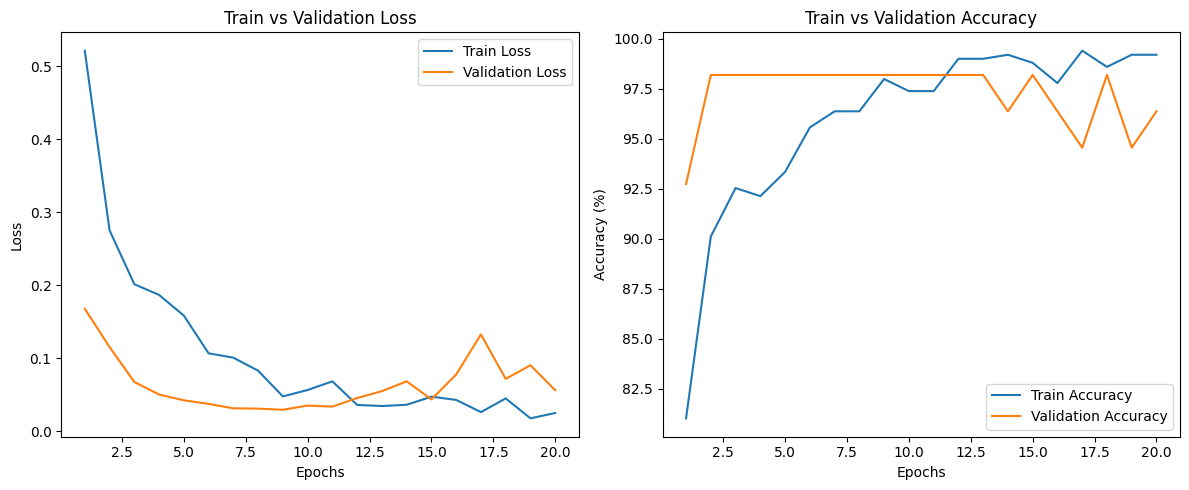

In [30]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

# Train & Validation with changed hyperparamters (learning rate, number of epochs)

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = myComplexNet().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.004)

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []
num_epochs = 40

In [32]:
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Apply a threshold of 0.5 to model outputs and compare with actual labels
        predicted = (outputs > 0.5).float()
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    model.eval()  # Set the model to evaluation mode
    val_running_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            val_loss = criterion(outputs, labels)
            val_running_loss += val_loss.item()

            predicted_val = (outputs > 0.5).float()
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_running_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, '
          f'Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.2f}%')

Epoch 1/40, Train Loss: 0.7899, Train Accuracy: 86.26%, Val Loss: 0.1588, Val Accuracy: 92.73%
Epoch 2/40, Train Loss: 0.7347, Train Accuracy: 88.69%, Val Loss: 0.0516, Val Accuracy: 98.18%
Epoch 3/40, Train Loss: 0.6625, Train Accuracy: 90.91%, Val Loss: 0.0426, Val Accuracy: 96.36%
Epoch 4/40, Train Loss: 0.8749, Train Accuracy: 91.52%, Val Loss: 0.0302, Val Accuracy: 98.18%
Epoch 5/40, Train Loss: 0.5713, Train Accuracy: 93.94%, Val Loss: 0.0348, Val Accuracy: 98.18%
Epoch 6/40, Train Loss: 0.5157, Train Accuracy: 94.34%, Val Loss: 0.0333, Val Accuracy: 98.18%
Epoch 7/40, Train Loss: 0.1476, Train Accuracy: 96.36%, Val Loss: 0.0312, Val Accuracy: 98.18%
Epoch 8/40, Train Loss: 0.3384, Train Accuracy: 96.77%, Val Loss: 0.0456, Val Accuracy: 98.18%
Epoch 9/40, Train Loss: 0.2865, Train Accuracy: 96.77%, Val Loss: 0.0533, Val Accuracy: 96.36%
Epoch 10/40, Train Loss: 0.3157, Train Accuracy: 95.56%, Val Loss: 0.0566, Val Accuracy: 96.36%
Epoch 11/40, Train Loss: 0.2869, Train Accuracy: 

# Visualization

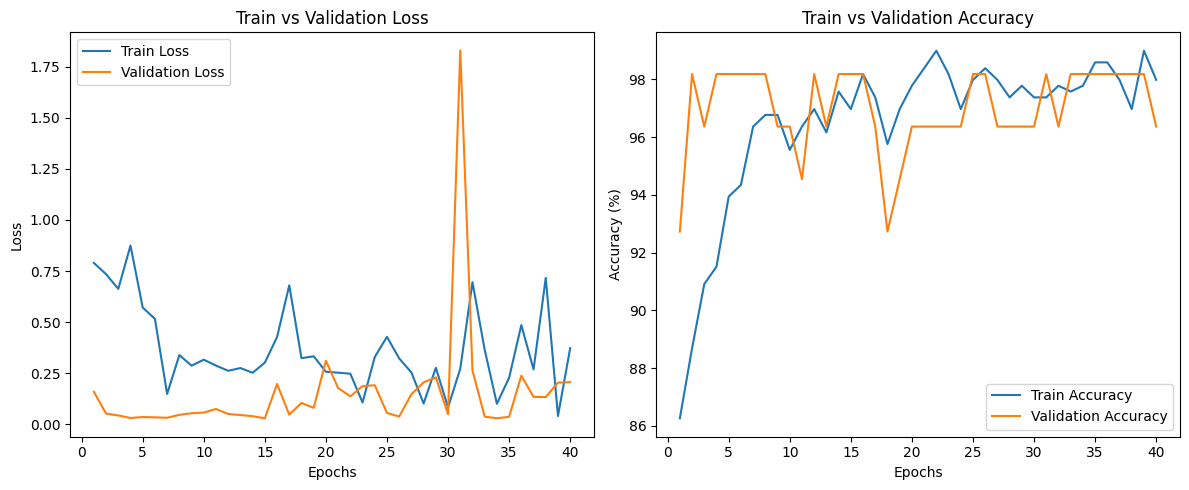

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()